**Student Name:** Mariem Ahmed

**Student Number:** 500929808

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

=========================================
Associated tasks
=========================================

	- Regression:
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================

For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


When evaluating a regression model, Mean Squared Error (MSE) and R-squared are two common metrics that provide insights into the model's performance.

1. **Mean Squared Error (MSE):** MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit of the model. To determine if the MSE is good or not, it should be compared to other models or to a baseline model. Lower MSE values are generally better, but what constitutes a "good" MSE can vary depending on the context of your data. It's crucial to consider the range of your target variable.

2. **R-squared (R^2):** R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. R-squared values range from 0 to 1, where 0 indicates that the model doesn't explain any variance, and 1 indicates that the model explains all the variance. A higher R-squared value suggests a better fit of the model. However, a high R-squared value doesn't necessarily mean that your model is a good fit. It might be overfitting the data, so you should also consider the model's complexity.

In [1]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

In [ ]:
import pandas as pd
df = pd.read_csv('day.csv')
df

In [ ]:
import pandas as pd
df = pd.read_csv('hour.csv')
df

In [5]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
!pip install virtualenv

In [ ]:
# Install PyCaret (if not already installed)
!pip install pycaret

In [ ]:
!pip install --upgrade pycaret yellowbrick

In [18]:
!pip install --upgrade pip setuptools

In [ ]:
!pip install numpy==1.19.5

In [ ]:
pip install numpy

In [ ]:
!pip install --upgrade scipy

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('hour.csv')
# Select the features (independent variables) and the target variable (count of rental bikes)
features = data[['temp', 'hum', 'windspeed']]
target = data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Now, you can use the trained model to make predictions on new data.

Mean Squared Error: 23553.842904647856
R-squared: 0.25616494747598406


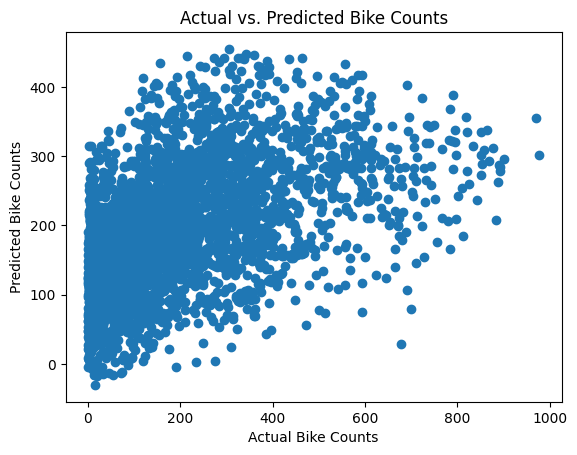

In [24]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Bike Counts")
plt.ylabel("Predicted Bike Counts")
plt.title("Actual vs. Predicted Bike Counts")
plt.show()

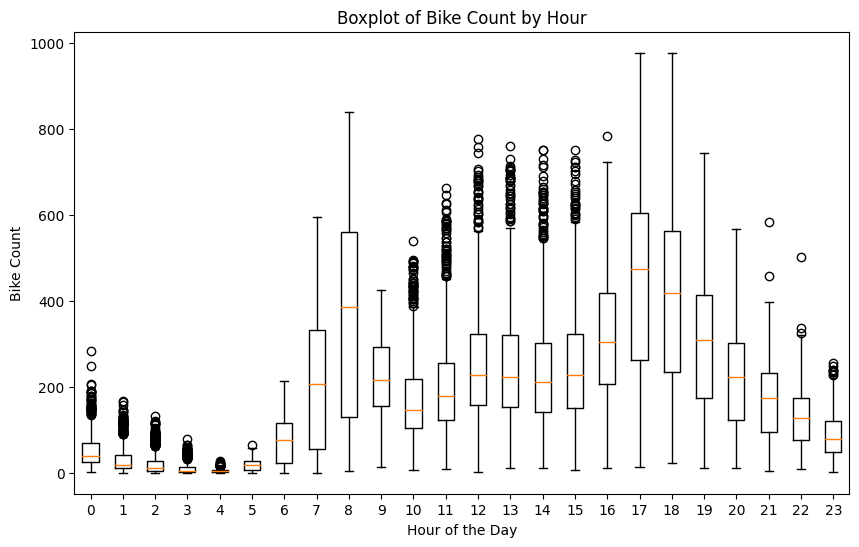

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['cnt'][data['hr'] == hour] for hour in range(24)], labels=[str(hour) for hour in range(24)])
# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Count')
plt.title('Boxplot of Bike Count by Hour')

plt.show()

# **Using PyCaret Regression Model**

In [75]:
# Import PyCaret regression module
from pycaret.regression import *
s = setup(data, target = 'cnt', session_id = 123)

# Load the dataset
data = pd.read_csv('hour.csv')

# Initialize the PyCaret regression environment
regression_setup = setup(data, target='cnt', session_id=123, verbose=False)

# Compare regression models and choose the best one
best_model = compare_models()

# Create and tune the selected model
tuned_model = tune_model(best_model)

# Evaluate the model
evaluate_model(tuned_model)

# Make predictions
predictions = predict_model(tuned_model, data=data)

# Save the model
save_model(tuned_model, 'bike_rental_regression_model')

# Load the saved model
loaded_model = load_model('bike_rental_regression_model')

# Make predictions using the loaded model
new_data = data.sample(10)  # Example: Predict for 10 random data points
predictions = predict_model(loaded_model, data=new_data)

# Display predictions
print(predictions)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 17)"
4,Transformed data shape,"(17379, 17)"
5,Transformed train set shape,"(12165, 17)"
6,Transformed test set shape,"(5214, 17)"
7,Numeric features,15
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.6420
llar,Lasso Least Angle Regression,0.0140,0.0004,0.0209,1.0000,0.0009,0.0005,0.1760
lasso,Lasso Regression,0.0127,0.0004,0.0188,1.0000,0.0009,0.0005,0.1820
par,Passive Aggressive Regressor,0.0646,0.0062,0.0779,1.0000,0.0064,0.0031,0.1220
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0990
huber,Huber Regressor,0.0977,0.0251,0.1288,1.0000,0.0075,0.0036,0.2240
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1830
en,Elastic Net,0.0137,0.0004,0.0205,1.0000,0.0009,0.0005,0.1740
ridge,Ridge Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1730
et,Extra Trees Regressor,0.8438,7.9262,2.6948,0.9998,0.0085,0.0038,3.9220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5792      5793  2011-09-03       3   0     9  19        0        6   
7823      7824  2011-11-27       4   0    11  14        0        0   
15426    15427  2012-10-09       4   1    10  23        0        2   
15028    15029  2012-09-23       4   1     9   9        0        0   
12290    12291  2012-06-01       2   1     6   7        0        5   
3262      3263  2011-05-20       2   0     5  20        0        5   
10763    10764  2012-03-29       2   1     3  14        0        4   
12384    12385  2012-06-05       2   1     6   5        0        2   
6051      6052  2011-09-14       3   0     9  17        0        3   
948        949  2011-02-12       1   0     2   3        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5792            0           1  0.70  0.6667  0.74     0.1343     147   
7823            0           1  0.62  0.6212  0.43     0.4627     113   
15426        

# **Initializing Different Parameters for Comparing the Results**

In [89]:
# Import PyCaret regression module
from pycaret.regression import *

# Load the dataset
data = pd.read_csv('hour.csv')

# Initialize the PyCaret regression environment
regression_setup = setup(data, target='cnt', session_id=786, verbose=False)

# Compare regression models and choose the best one
best_model = compare_models()

# Create and tune the selected model
tuned_model = tune_model(best_model)

# Evaluate the model
evaluate_model(tuned_model)

# Make predictions
predictions = predict_model(tuned_model, data=data)

# Save the model
save_model(tuned_model, 'bike_rental_regression_model')

# Load the saved model
loaded_model = load_model('bike_rental_regression_model')

# Make predictions using the loaded model
new_data = data.sample(200)  # Example: Predict for 20 random data points
predictions = predict_model(loaded_model, data=new_data)

# Display predictions
print(predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1630
llar,Lasso Least Angle Regression,0.0137,0.0004,0.0207,1.0000,0.0009,0.0005,0.1440
lasso,Lasso Regression,0.0125,0.0004,0.0187,1.0000,0.0009,0.0005,0.1610
par,Passive Aggressive Regressor,0.0574,0.0050,0.0706,1.0000,0.0054,0.0026,0.1150
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0890
huber,Huber Regressor,0.0855,0.0166,0.1047,1.0000,0.0068,0.0033,0.2120
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1570
en,Elastic Net,0.0135,0.0004,0.0202,1.0000,0.0009,0.0005,0.1590
ridge,Ridge Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1610
et,Extra Trees Regressor,0.8470,8.2087,2.7066,0.9998,0.0076,0.0037,3.6310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
13452    13453  2012-07-19       3   1     7  17        0        4   
13662    13663  2012-07-28       3   1     7  11        0        6   
14932    14933  2012-09-19       3   1     9   9        0        3   
4497      4498  2011-07-11       3   0     7   7        0        1   
8778      8779  2012-01-06       1   1     1  14        0        5   
...        ...         ...     ...  ..   ...  ..      ...      ...   
3298      3299  2011-05-22       2   0     5   8        0        0   
13099    13100  2012-07-05       3   1     7   0        0        4   
16101    16102  2012-11-08       4   1    11  15        0        4   
2787      2788  2011-05-01       2   0     5   1        0        0   
12830    12831  2012-06-23       3   1     6  19        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
13452           1           1  0.86  0.7879  0.41     0.0000      93   
13662          

### **Comparing the two models with different parameters, we still get the same best models from previous parameters above, that said the model's performance, and the predictions will vary based on the data, preprocessing, and tuning settings we apply, in that case the same selected best models still the same.**

In [76]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [77]:
# show predictions df
holdout_pred.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prediction_label
5792,5793,2011-09-03,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,147,148,295,295.0
7823,7824,2011-11-27,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,113,200,313,313.0
15426,15427,2012-10-09,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,8,76,84,84.0
15028,15029,2012-09-23,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,71,205,276,276.0
12290,12291,2012-06-01,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,33,369,402,402.0


In [65]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prediction_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1.0


In [66]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed',
                                              'casual', 'registered'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
             

In [67]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed',
                                             'casual', 'registered'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [71]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


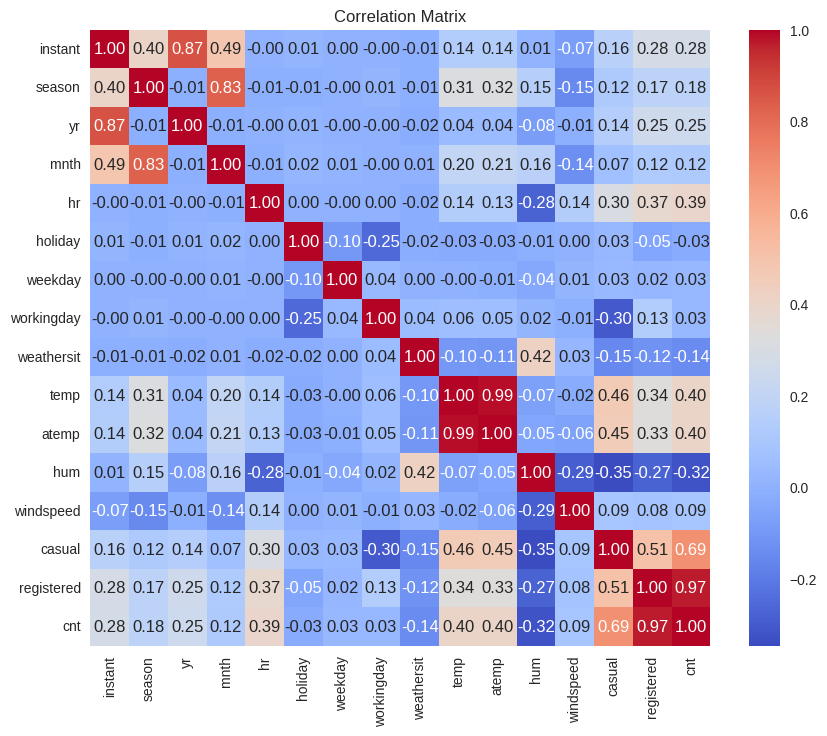

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with independent variables
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### **Correlation Coefficient Range:**
Correlation coefficients range from -1 to 1.
* A value of -1 indicates a perfect negative linear relationship.
* A value of 1 indicates a perfect positive linear relationship.
* A value of 0 indicates no linear relationship.

### **Strength of Correlation:**
* The absolute value of the correlation coefficient indicates the strength of the relationship. The closer it is to 1 (positive or negative), the stronger the relationship.

### **Direction of Correlation:**
* A positive correlation (coefficient > 0) implies that as one variable increases, the other tends to increase as well.
* A negative correlation (coefficient < 0) implies that as one variable increases, the other tends to decrease.

**Now, let's interpret the results you provided in your correlation matrix:**

* **temp** and **atemp** have a very high positive correlation (close to 1). This indicates that they are almost perfectly linearly related, which is expected since they represent temperature-related variables. Using both in the same regression model may cause multicollinearity issues, as confirmed by the VIF results.

* **temp** and **hum** have a low negative correlation (around -0.2). This suggests a weak negative linear relationship, meaning that as temperature (temp) increases, humidity (hum) tends to decrease slightly.

* **temp** and **windspeed** have a low positive correlation (around 0.1). This indicates a weak positive linear relationship, meaning that as temperature (temp) increases, windspeed (windspeed) tends to increase slightly.
atemp and hum also have a low negative correlation (around -0.1), suggesting a weak negative linear relationship.

* **atemp** and **windspeed** have a very low positive correlation (close to 0), indicating almost no linear relationship between them.

**In summary**, the correlation matrix reveals strong positive linear correlation between temp and atemp, which could lead to multicollinearity issues in regression analysis. It also shows weak relationships between these temperature-related variables and other predictors (hum and windspeed). Understanding these relationships is crucial for selecting the right variables and ensuring the stability and interpretability of your regression model.

In [85]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Assuming 'data' is your DataFrame with independent variables

# Create a DataFrame containing only the independent variables
X = data[['temp', 'atemp', 'hum', 'windspeed']]

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable         VIF
0       temp  316.369402
1      atemp  341.187692
2        hum    5.853368
3  windspeed    2.711306


# **Interpreting the VIF values:**

Variables with VIF values close to 1 indicate a low degree of multicollinearity, which is desirable.


Variables with high VIF values (typically greater than 5 or 10) indicate a high degree of multicollinearity and may need further investigation or potentially be removed from the model.


## **Based on the results above:**

**temp** and **atemp** have extremely high VIF values, indicating a strong multicollinearity between these two variables. This high multicollinearity can make it difficult to distinguish the unique effects of these variables on the dependent variable.

**hum** and **windspeed** have relatively low VIF values, suggesting a lower degree of multicollinearity with other variables in the model.

In [90]:
save_experiment('my_experiment')
exp_from_disk = load_experiment('my_experiment', data=data)